https://www.kaggle.com/aadhavvignesh/regression-with-scikit-learn-practical-ml-1

https://www.kaggle.com/gavinmandias/beijing-housing-prices-analysing-and-predicting


318851 x 26

Housing price of Beijing from 2011 to 2017, fetching from Lianjia.com

```
url: the url which fetches the data
id: the id of transaction
Lng: and Lat coordinates, using the BD09 protocol.
Cid: community id
tradeTime: the time of transaction
DOM: active days on market.Know more in https://en.wikipedia.org/wiki/Days_on_market
followers: the number of people follow the transaction.
totalPrice: the total price
price: the average price by square
square: the square of house
livingRoom: the number of living room
drawingRoom: the number of drawing room
kitchen: the number of kitchen
bathroom the number of bathroom
floor: the height of the house. I will turn the Chinese characters to English in the next version.
buildingType: including tower( 1 ) , bungalow( 2 )，combination of plate and tower( 3 ), plate( 4 ).
constructionTime: the time of construction
renovationCondition: including other( 1 ), rough( 2 ),Simplicity( 3 ), hardcover( 4 )
buildingStructure: including unknow( 1 ), mixed( 2 ), brick and wood( 3 ), brick and concrete( 4 ),steel( 5 ) and steel-concrete composite ( 6 ).
ladderRatio: the proportion between number of residents on the same floor and number of elevator of ladder. It describes how many ladders a resident have on average.
elevator have ( 1 ) or not have elevator( 0 )
fiveYearsProperty: if the owner have the property for less than 5 years,
```


In [16]:
import numpy as np
import pandas as pd
df = pd.read_csv("../data/HousePriceBeijing2017/beijing.csv", encoding='iso-8859-1', low_memory = False)
df.head()

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,...,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,...,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,...,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,...,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,...,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0


.info() helps us to see how many values are existing in each column and their data type. Here, we can see many columns have missing values which we need to fill with some sensible values. Handling missing data is important as many machine learning algorithms do not support data with missing values.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   url                  318851 non-null  object 
 1   id                   318851 non-null  object 
 2   Lng                  318851 non-null  float64
 3   Lat                  318851 non-null  float64
 4   Cid                  318851 non-null  int64  
 5   tradeTime            318851 non-null  object 
 6   DOM                  160874 non-null  float64
 7   followers            318851 non-null  int64  
 8   totalPrice           318851 non-null  float64
 9   price                318851 non-null  int64  
 10  square               318851 non-null  float64
 11  livingRoom           318851 non-null  object 
 12  drawingRoom          318851 non-null  object 
 13  kitchen              318851 non-null  int64  
 14  bathRoom             318851 non-null  object 
 15  floor            

.describe() is used to view some basic statistical details like percentile, mean, std, etc. of a DataFrame.

In [18]:
df.describe()

,Lng,Lat,Cid,DOM,followers,totalPrice,price,square,kitchen,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
count,318851.000000,318851.000000,3.188510e+05,160874.000000,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,316830.000000,318851.000000,318851.000000,3.188510e+05,318819.000000,318819.000000,318819.000000,318851.000000,318388.000000
mean,116.418459,39.949591,1.129113e+12,28.822339,16.731508,349.030201,43530.436379,83.240597,0.994599,3.009790,2.606330,4.451026,6.316486e+01,0.577055,0.645601,0.601112,6.763564,63682.446305
std,0.112054,0.091983,2.363447e+12,50.237343,34.209185,230.780778,21709.024204,37.234661,0.109609,1.269857,1.311739,1.901753,2.506851e+04,0.494028,0.478331,0.489670,2.812616,22329.215447
min,116.072514,39.627030,1.111027e+12,1.000000,0.000000,0.100000,1.000000,6.900000,0.000000,0.048000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,10847.000000
25%,116.344985,39.893200,1.111027e+12,1.000000,0.000000,205.000000,28050.000000,57.900000,1.000000,1.000000,1.000000,2.000000,2.500000e-01,0.000000,0.000000,0.000000,6.000000,46339.000000
50%,116.416780,39.934527,1.111027e+12,6.000000,5.000000,294.000000,38737.000000,74.260000,1.000000,4.000000,3.000000,6.000000,3.330000e-01,1.000000,1.000000,1.000000,7.000000,59015.000000
75%,116.477581,40.003018,1.111027e+12,37.000000,18.000000,425.500000,53819.500000,98.710000,1.000000,4.000000,4.000000,6.000000,5.000000e-01,1.000000,1.000000,1.000000,8.000000,75950.000000
max,116.732378,40.252758,1.114620e+15,1677.000000,1143.000000,18130.000000,156250.000000,1745.500000,4.000000,4.000000,4.000000,6.000000,1.000940e+07,1.000000,1.000000,1.000000,13.000000,183109.000000


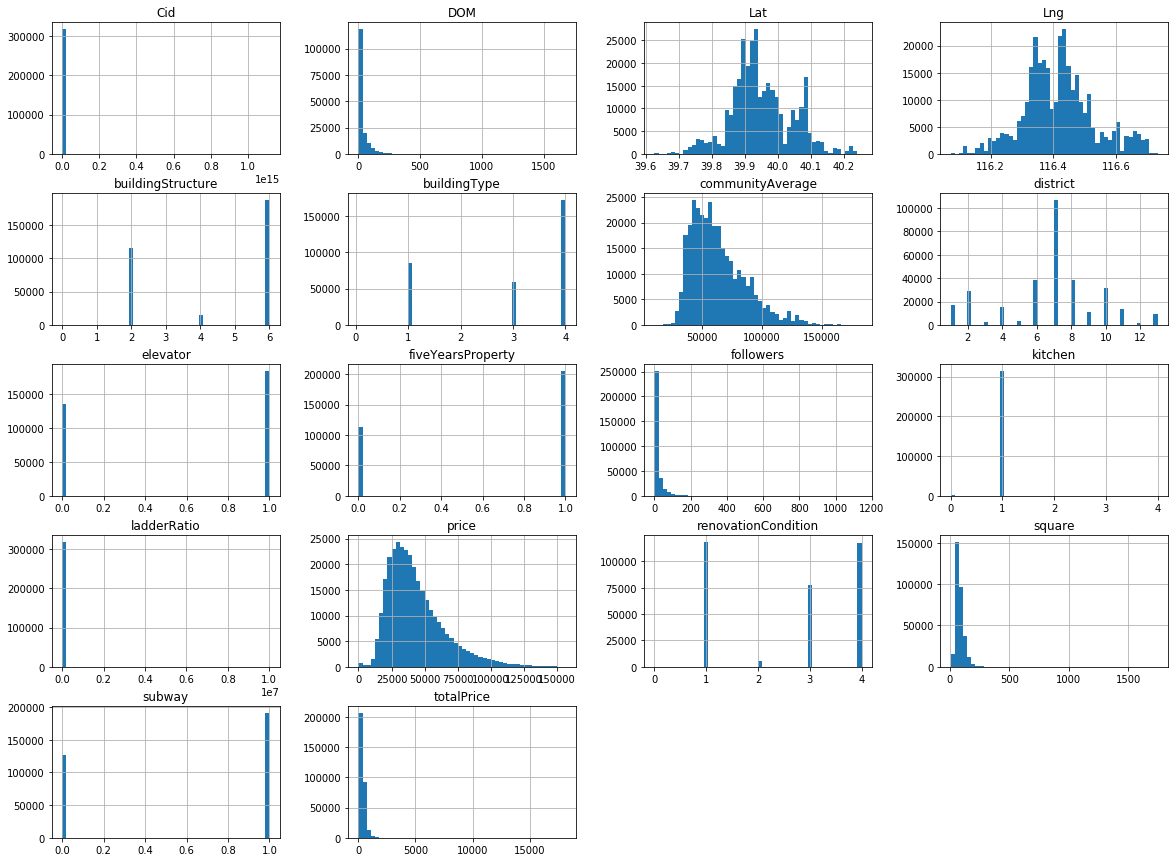

In [19]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import itertools

df.hist(bins=50, figsize=(20,15))
plt.show()

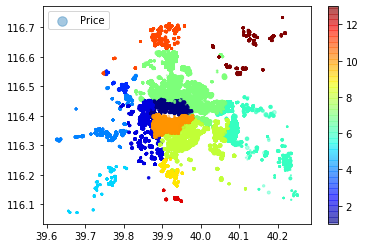

In [21]:
fig = plt.scatter(x=df['Lat'], y=df['Lng'], alpha=0.4, \
    s=df['totalPrice']/100, label='Price', \
    c=df['district'], cmap=plt.get_cmap('jet'))
plt.colorbar(fig)
plt.legend()
plt.show()

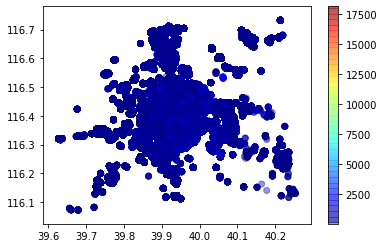

In [22]:
fig = plt.scatter(x=df['Lat'], y=df['Lng'], alpha=0.4, \
    c=df['totalPrice'], cmap=plt.get_cmap('jet'))
plt.colorbar(fig)
plt.show()

.corr() is used to find the pairwise correlation of all columns in the dataframe.

In [23]:
df.corr()

,Lng,Lat,Cid,DOM,followers,totalPrice,price,square,kitchen,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
Lng,1.000000,0.040847,-0.007301,-0.014274,-0.012846,-0.069831,-0.153212,0.064499,0.059142,0.008718,-0.005859,0.041754,0.002027,0.044275,0.009599,-0.015972,0.223282,-0.175197
Lat,0.040847,1.000000,-0.000257,0.022363,-0.005676,0.019969,-0.052004,0.119889,-0.000721,0.099777,0.011923,-0.157967,-0.000197,-0.102542,0.009689,-0.077373,0.308592,-0.068064
Cid,-0.007301,-0.000257,1.000000,0.000952,0.001264,0.000071,-0.000387,-0.000413,-0.002429,0.006176,-0.001008,0.001097,-0.000019,-0.000505,-0.008716,0.000992,-0.004429,-0.005487
DOM,-0.014274,0.022363,0.000952,1.000000,0.465489,0.225404,0.215473,0.080909,0.010662,-0.010857,0.152300,0.025380,-0.001083,0.023424,-0.044317,0.010079,-0.001235,0.026475
followers,-0.012846,-0.005676,0.001264,0.465489,1.000000,0.152681,0.257173,-0.050814,0.007651,0.010707,0.241108,-0.022586,-0.000200,-0.020761,0.049632,0.018243,-0.032447,-0.012286
totalPrice,-0.069831,0.019969,0.000071,0.225404,0.152681,1.000000,0.622658,0.575843,0.081393,-0.060346,0.250890,0.188114,-0.001063,0.192345,-0.003225,0.113183,0.010315,0.421428
price,-0.153212,-0.052004,-0.000387,0.215473,0.257173,0.622658,1.000000,-0.164734,0.013289,-0.048676,0.294859,0.042889,0.001107,0.050528,0.014151,0.232571,0.034186,0.683768
square,0.064499,0.119889,-0.000413,0.080909,-0.050814,0.575843,-0.164734,1.000000,0.087816,-0.013511,0.031502,0.156217,-0.002420,0.168131,-0.018164,-0.094973,-0.007301,-0.146136
kitchen,0.059142,-0.000721,-0.002429,0.010662,0.007651,0.081393,0.013289,0.087816,1.000000,0.013062,-0.009705,-0.010838,0.000124,-0.005167,0.045779,0.010617,-0.033746,0.024271
buildingType,0.008718,0.099777,0.006176,-0.010857,0.010707,-0.060346,-0.048676,-0.013511,0.013062,1.000000,-0.011312,-0.535491,-0.000017,-0.630052,-0.000532,-0.147666,0.043837,-0.089884


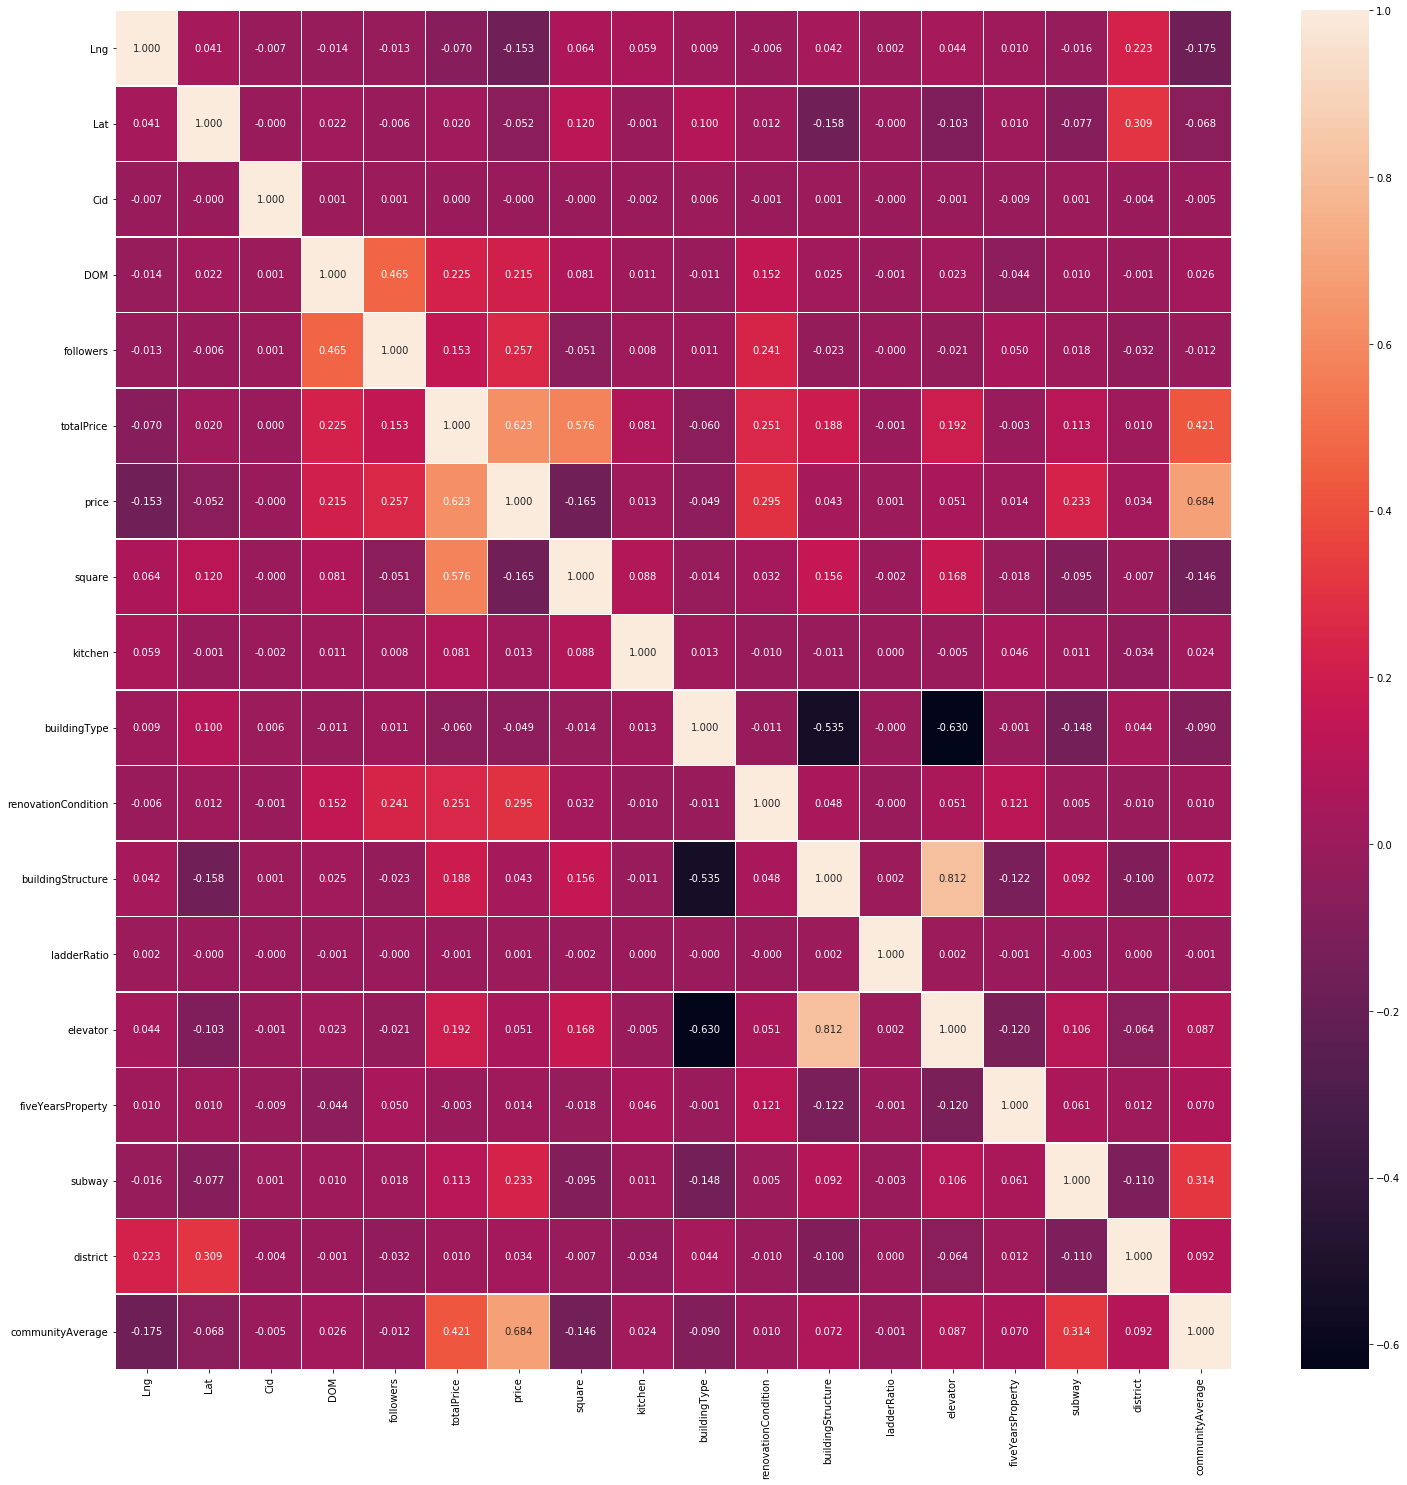

In [24]:
f,ax = plt.subplots(figsize=(25, 25))
sns.heatmap(df.corr(), annot = True, linewidth = .5, fmt = ".3f",ax = ax)
plt.show()

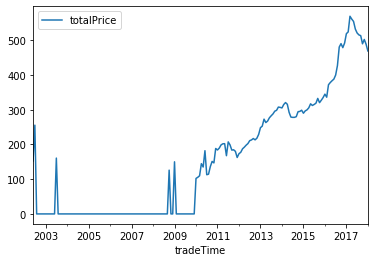

In [25]:
price_by_trade_time = pd.DataFrame()
price_by_trade_time['totalPrice'] = df['totalPrice']
price_by_trade_time.index = df['tradeTime'].astype('datetime64[ns]')
price_by_trade_month = price_by_trade_time.resample('M').mean().to_period('M').fillna(0)
price_by_trade_month.plot(kind='line')
plt.show()

/Users/fengjie/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


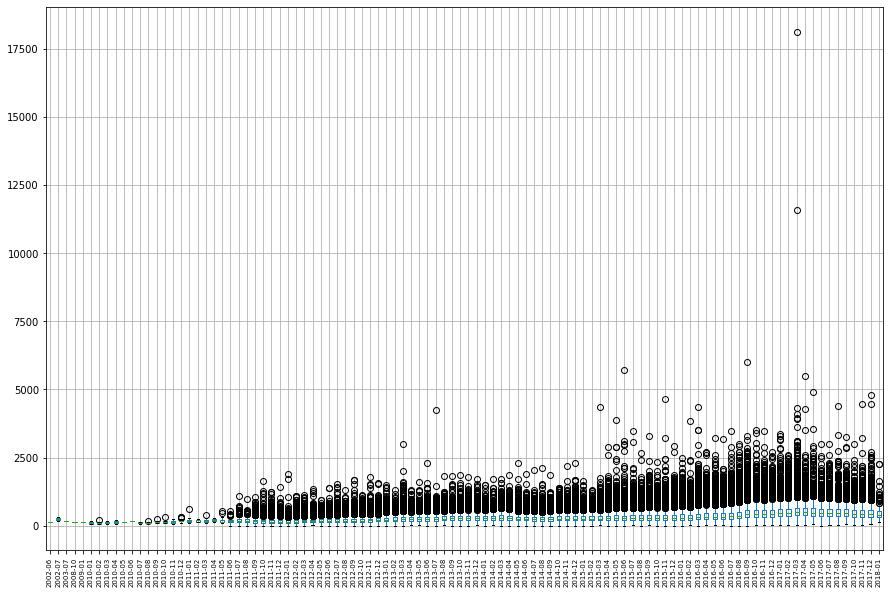

In [26]:
price_stat_trade_month_index = [x.strftime('%Y-%m') for x in set(price_by_trade_time.to_period('M').index)]
price_stat_trade_month_index.sort()
price_stat_trade_month = []
for month in price_stat_trade_month_index:
    price_stat_trade_month.append(price_by_trade_time[month]['totalPrice'].values)
price_stat_trade_month = pd.DataFrame(price_stat_trade_month)
price_stat_trade_month.index = price_stat_trade_month_index
price_stat_trade_month = price_stat_trade_month.T
price_stat_trade_month.boxplot(figsize=(15,10))
plt.xticks(rotation=90,fontsize=7)
plt.show()

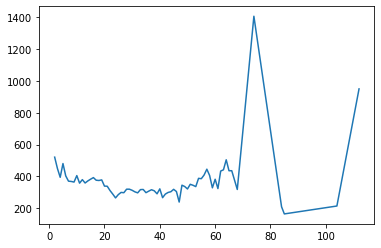

In [27]:
price_by_cons_time = pd.DataFrame()
price_by_cons_time['totalPrice'] = df['totalPrice']
price_by_cons_time['constructionTime'] = df['constructionTime']
price_by_cons_time = price_by_cons_time[
	(price_by_cons_time.constructionTime != '0')
	& (price_by_cons_time.constructionTime != '1')
	& (price_by_cons_time.constructionTime != 'Î´Öª')
]
price_by_cons_time['constructionTime'] = price_by_cons_time['constructionTime'].astype('int64')
price_by_cons_time['constructionTime'] = 2018 - price_by_cons_time['constructionTime']
price_by_cons_time_index = list(set(price_by_cons_time['constructionTime']))
price_by_cons_time_index.sort()
price_by_cons_time.index = price_by_cons_time['constructionTime']
price_by_cons_time = price_by_cons_time.drop('constructionTime', axis=1)
price_by_cons_time_line = []
price_by_cons_time_stat = []
for years in price_by_cons_time_index:
	price_by_cons_time_line.append(price_by_cons_time.loc[years]['totalPrice'].mean())
	try:
		price_by_cons_time_stat.append(price_by_cons_time.loc[years]['totalPrice'].values)
	except Exception:
		price_by_cons_time_stat.append(np.array([price_by_cons_time.loc[years]['totalPrice']]))
plt.plot(list(price_by_cons_time_index), price_by_cons_time_line)
plt.show()

/Users/fengjie/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


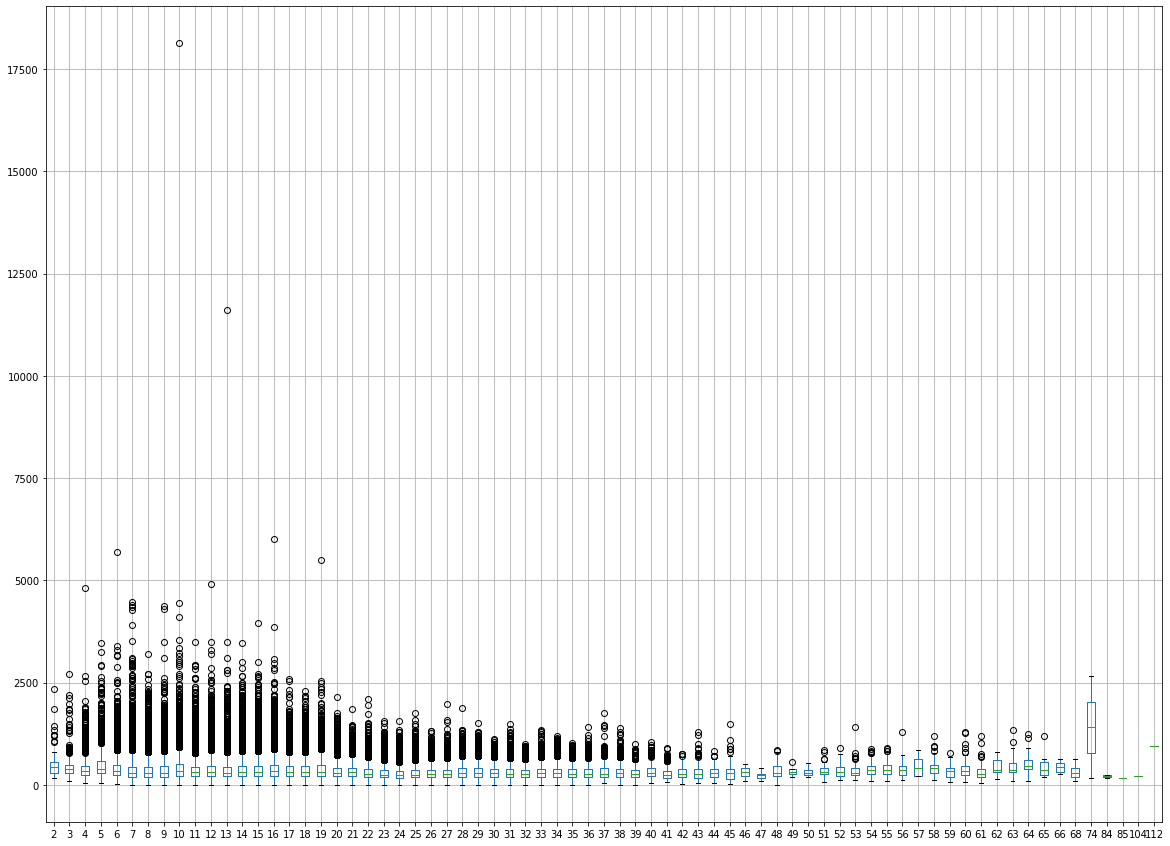

In [28]:
price_by_cons_time_stat = pd.DataFrame(price_by_cons_time_stat)
price_by_cons_time_stat.index = price_by_cons_time_index
price_by_cons_time_stat = price_by_cons_time_stat.T
price_by_cons_time_stat.boxplot(figsize=(20,15))
plt.show()

/Users/fengjie/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


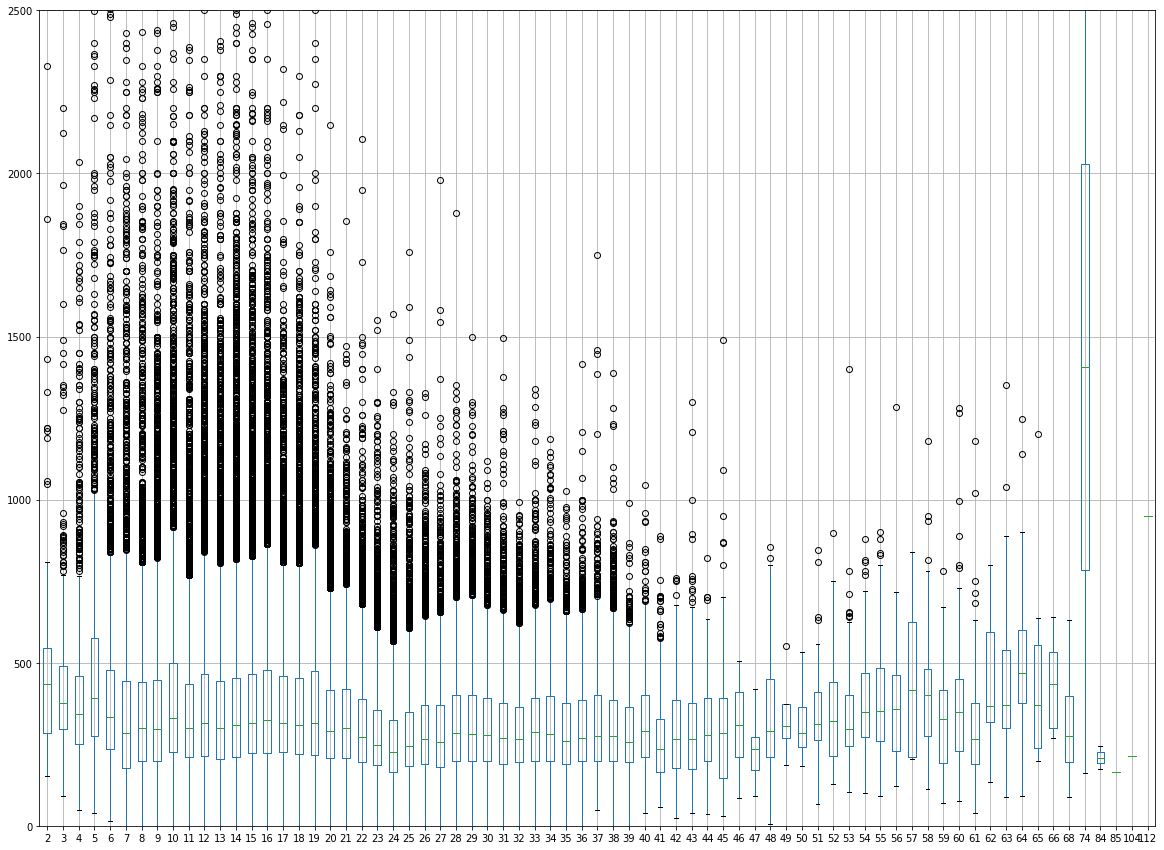

In [29]:
price_by_cons_time_stat.boxplot(figsize=(20,15))
plt.ylim(0,2500)
plt.show()

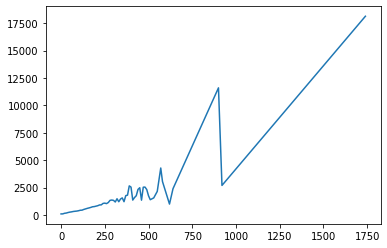

In [30]:
#square and price
price_by_square = pd.DataFrame()
price_by_square['totalPrice'] = df['totalPrice']
price_by_square['square'] = df['square']
price_by_square['square'] = np.ceil(price_by_square['square'])
price_by_square['square'] = price_by_square['square'] - (price_by_square['square'] % 10)
price_by_square_index = list(set(price_by_square['square']))
price_by_square_index.sort()
price_by_square.index = price_by_square['square']
price_by_square_line = []
price_by_square_stat = []
for squares in price_by_square_index:
	price_by_square_line.append(price_by_square.loc[squares]['totalPrice'].mean())
	try:
		price_by_square_stat.append(price_by_square.loc[squares]['totalPrice'].values)
	except Exception:
		price_by_square_stat.append(np.array([price_by_square.loc[squares]['totalPrice']]))
plt.plot(price_by_square_index, price_by_square_line)
plt.show()

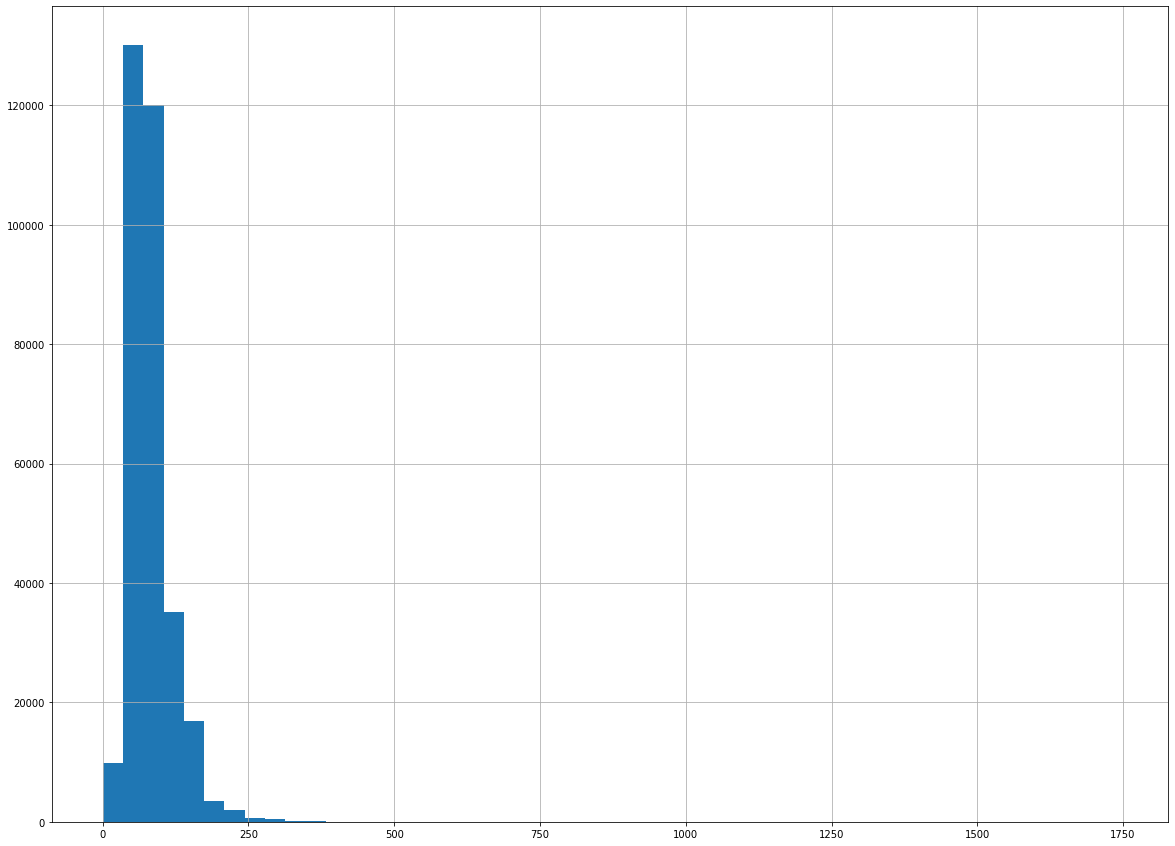

In [31]:
price_by_square['square'].hist(bins=50, figsize=(20,15))
plt.show()

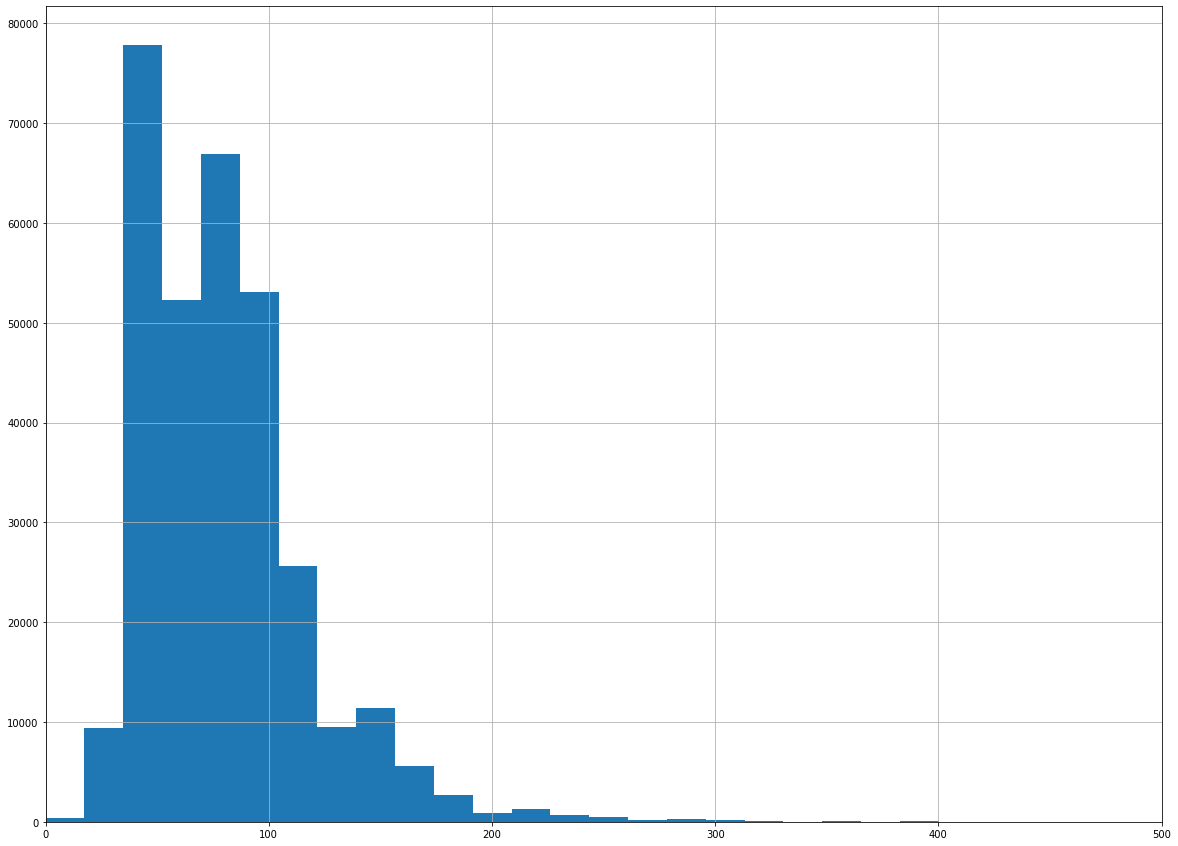

In [32]:
price_by_square['square'].hist(bins=100, figsize=(20,15))
plt.xlim(0,500)
plt.show()

/Users/fengjie/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


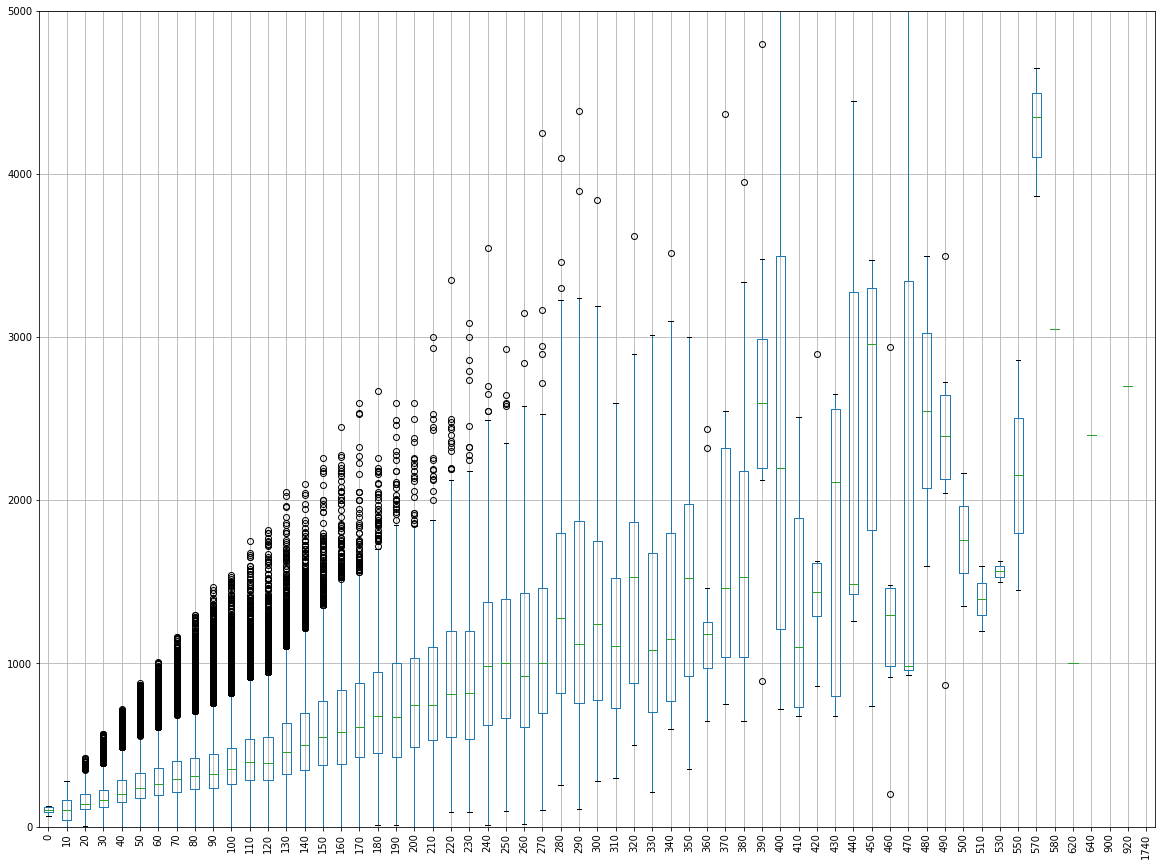

In [33]:
price_by_square_stat = pd.DataFrame(price_by_square_stat).T
price_by_square_index = [int(x) for x in price_by_square_index]
price_by_square_stat.columns = price_by_square_index
price_by_square_stat.boxplot(figsize=(20,15))
plt.xticks(rotation=90)
plt.ylim(0,5000)
plt.show()

In [34]:
def get_mean(price_by_square):
	try:
		price_by_square_index = list(set(price_by_square['square']))
		price_by_square_index.sort()
		price_by_square_line = []
		price_by_square.index = price_by_square['square']
		for squares in price_by_square_index:
			price_by_square_line.append(price_by_square.loc[squares]['totalPrice'].mean())
		price_by_square_index = [int(x) for x in price_by_square_index]
	except Exception:
		price_by_square_line = [price_by_square.loc['totalPrice']]
		price_by_square_index = [int(price_by_square['square'])]
	return price_by_square_line, price_by_square_index

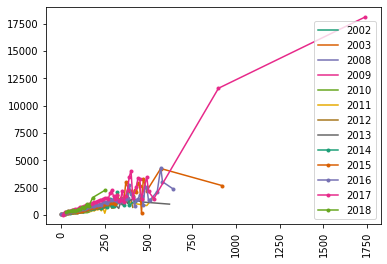

In [35]:
price = pd.DataFrame()
price['totalPrice'] = df['totalPrice']
price['square'] = df['square']
price.index = df['tradeTime'].astype('datetime64[ns]')
price['square'] = np.ceil(price['square'])
price['square'] = price['square'] - (price['square'] % 10)
price = price.to_period('Y')
price_time_index = [x.strftime('%Y') for x in set(price.index)]
price_time_index.sort()
colormap = mpl.cm.Dark2.colors
m_styles = ['','.','o','^','*']
for year, (maker, color) in zip(price_time_index, itertools.product(m_styles, colormap)):
    y, x = get_mean(price.loc[year])
    plt.plot(x, y, color=color, marker=maker, label=year)
plt.xticks(rotation=90)
plt.legend(price_time_index)
plt.show()

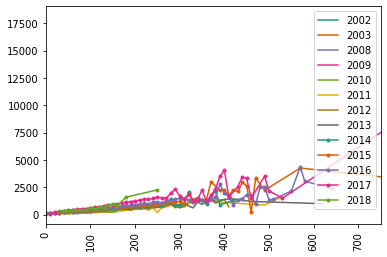

In [36]:
for year, (maker, color) in zip(price_time_index, itertools.product(m_styles, colormap)):
    y, x = get_mean(price.loc[year])
    plt.plot(x, y, color=color, marker=maker, label=year)
plt.xticks(rotation=90)
plt.legend(price_time_index)
plt.xlim(0,750)
plt.show()

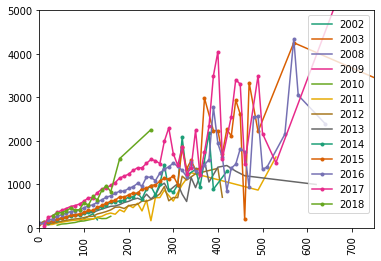

In [37]:
for year, (maker, color) in zip(price_time_index, itertools.product(m_styles, colormap)):
    y, x = get_mean(price.loc[year])
    plt.plot(x, y, color=color, marker=maker, label=year)
plt.xticks(rotation=90)
plt.legend(price_time_index)
plt.xlim(0,750)
plt.ylim(0,5000)
plt.show()

Now, we select the most significant features and correlated features from the correlation matrix.

In [5]:
df = df[['totalPrice', 'square', 'renovationCondition', 'communityAverage']]
df.head()

,totalPrice,square,renovationCondition,communityAverage
0,415.0,131.00,3,56021.0
1,575.0,132.38,4,71539.0
2,1030.0,198.00,3,48160.0
3,297.5,134.00,1,51238.0
4,392.0,81.00,2,62588.0


Dealing with Missing Data
Oops! It seems like we're about to perform training on a dataframe consisting of NaN (Not a Number) values. Here are some strategies to handle NaN values:

- Remove rows with NaN values: This is generally not preferred as substantial data can be lost, and could also lead to improper distribution of values.
- Filling NaN values with scalar values: This is helpful to some extent, but it can also lead to improper distribution of data.
- Filling NaN values with mean: Filling with mean helps to maintain the distribution of values in the dataframe and hence is more preferred than other methods.
    
Let us fill NaN values using mean.

In [6]:
df = df.fillna(df.mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   totalPrice           318851 non-null  float64
 1   square               318851 non-null  float64
 2   renovationCondition  318851 non-null  int64  
 3   communityAverage     318851 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 9.7 MB


Let us set totalPrice as the target variable.

In [7]:
X = df.drop('totalPrice', axis = 1)
y = df['totalPrice']

Splitting Data into Training and Test Sets

The data we use is usually split into training data and test data using train_test_split. The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

Metrics for testing model's performance

The MSE, MAE, RMSE, and R-Squared are mainly used metrics to evaluate the prediction error rates and model performance in regression analysis.

- MAE (Mean absolute error) represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.
- MSE (Mean Squared Error) represents the difference between the original and predicted values extracted by squared the average difference over the data set.
- RMSE (Root Mean Squared Error) is the error rate by the square root of MSE.
- R-squared (Coefficient of determination) represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

Here we created helper functions to append the metrics to a DataFrame containing the results.

In [9]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

results_df = pd.DataFrame()
columns = ["Model", "Cross Val Score", "MAE", "MSE", "RMSE", "R2"]

def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

def append_results(model_name, model, results_df, y_test, pred):
    results_append_df = pd.DataFrame(data=[[model_name, *evaluate(y_test, pred) , cross_val_score(model, X, y, cv=10).mean()]], columns=columns)
    results_df = results_df.append(results_append_df, ignore_index = True)
    return results_df

Linear Regression

Linear regression is an algorithm which tries to learn the correlation between a dependent variable and one or more independent features.

In [10]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

pred = lin_reg.predict(X_test)

results_df = append_results("Linear Regression",  LinearRegression(), results_df, y_test, pred)
results_df

,Model,Cross Val Score,MAE,MSE,RMSE,R2
0,Linear Regression,95.942356,18707.409586,136.775033,0.646531,0.436052


Robust Regression

Robust regression is a form of regression analysis designed to overcome some limitations of traditional parametric and non-parametric methods. A common situation in which robust estimation is used occurs when the data contain outliers. One of the most popular approaches to outlier detection is RANSAC or Random Sample Consesus.

Random sample consensus (RANSAC) is an iterative method to estimate parameters of a mathematical model from a set of observed data that contains outliers, when outliers are to be accorded no influence on the values of the estimates.

In [11]:
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor()
model.fit(X_train, y_train)

pred = model.predict(X_test)
results_df = append_results("Robust Regression",  RANSACRegressor(), results_df, y_test, pred)
results_df

,Model,Cross Val Score,MAE,MSE,RMSE,R2
0,Linear Regression,95.942356,18707.409586,136.775033,0.646531,0.436052
1,Robust Regression,100.272828,27535.441448,165.938065,0.479729,0.483247


Ridge Regression

Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients. The ridge coefficients minimize a penalized residual sum of squares:

min𝑤||𝑋𝑤−𝑦||22+𝛼||𝑤||22 

The complexity parameter  𝛼≥0  controls the amount of shrinkage: the larger the value of , the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

In [12]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, y_train)
pred = model.predict(X_test)
results_df = append_results("Ridge Regression",  Ridge(), results_df, y_test, pred)
results_df

,Model,Cross Val Score,MAE,MSE,RMSE,R2
0,Linear Regression,95.942356,18707.409586,136.775033,0.646531,0.436052
1,Robust Regression,100.272828,27535.441448,165.938065,0.479729,0.483247
2,Ridge Regression,95.942348,18707.409714,136.775033,0.646531,0.436052


Lasso Regression

Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). This particular type of regression is well-suited for models showing high levels of muticollinearity.

In [13]:
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train, y_train)
pred = model.predict(X_test)
results_df = append_results("Lasso Regression",  Lasso(), results_df, y_test, pred)
results_df

,Model,Cross Val Score,MAE,MSE,RMSE,R2
0,Linear Regression,95.942356,18707.409586,136.775033,0.646531,0.436052
1,Robust Regression,100.272828,27535.441448,165.938065,0.479729,0.483247
2,Ridge Regression,95.942348,18707.409714,136.775033,0.646531,0.436052
3,Lasso Regression,95.885338,18708.713459,136.779799,0.646506,0.436074


ElasticNet

ElasticNet combines L1 norms (LASSO) and L2 norms (ridge regression) into a penalized model for generalized linear regression. This gives it sparsity (L1) and robustness (L2) properties.

In [15]:
from sklearn.linear_model import ElasticNet

model = ElasticNet()
model.fit(X_train, y_train)
pred = model.predict(X_test)
results_df = append_results("ElasticNet Regression",  ElasticNet(), results_df, y_test, pred)
results_df

,Model,Cross Val Score,MAE,MSE,RMSE,R2
0,Linear Regression,95.942356,18707.409586,136.775033,0.646531,0.436052
1,Robust Regression,100.272828,27535.441448,165.938065,0.479729,0.483247
2,Ridge Regression,95.942348,18707.409714,136.775033,0.646531,0.436052
3,Lasso Regression,95.885338,18708.713459,136.779799,0.646506,0.436074
4,ElasticNet Regression,95.579404,18864.372975,137.347635,0.643565,0.431555


Summary:
In this notebook, you got to learn about:

- Inspecting Data
- Dealing with Missing Values
- Splitting Data into Training and Test Sets
- Common Linear Regression Algorithms (Linear, Ridge, Lasso, etc.)
- Comparison of all algorithms